In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [26]:

def d_hydro2(R, w, h, x_dim, y_dim, width, height, plot,iterations):
    
    # set some parameters to determine the indecies  
    x_i = int(x_dim/h)
    y_j = int(y_dim/h)
    width_b= int(width/h)
    height_b= int(height/h)
    len_E= int(36/h)
    
    # create the initial psi and psi_n+1
    psi = np.ones([x_i , y_j]) * np.arange(y_j) * h
    psi[:,0]=0
    psi[len_E:(len_E+width_b) , 0:height_b]=0
    psi_1 = np.copy(psi)
    
    # create the initial zeta and psi_n+1
    zeta = np.zeros([x_i , y_j])
    zeta_1 = np.copy(zeta)

    n=1
    run=True
    distance_l2=[]

    while n<4000 and run == True :
        #update the arrays 
        psi=np.copy(psi_1)
        zeta=np.copy(zeta_1)
        
        #applying the Gauss siedel method for the different areas 
        for j in range(y_j-1):
            for i in range(x_i-1):

                if i==0 and 1<=j<=(y_j-2):  #psi for F
                    psi_1[i,j] =(1/3) * (psi[i+1, j] + psi[i, j+1] + psi[i, j-1] - zeta[i, j])

                elif 1<=i<=(len_E-1) and 1<=j<=(y_j-2) : # the indecis around the barrier not including the boundaries 
                     psi_1[i,j]=(1/4)*(psi[i+1, j] + psi[i-1, j] + psi[i, j+1] + psi[i, j-1] - zeta[i, j])

                elif len_E<=i<=(len_E+width_b-1) and height_b<=j<=(y_j-2) : 
                    psi_1[i,j]=(1/4)*(psi[i+1, j] + psi[i-1, j] + psi[i, j+1] + psi[i, j-1] - zeta[i, j])


                elif (len_E+width_b)<=i<=(x_i-2) and 1<=j<=(y_j-2) : 
                    psi_1[i,j]=(1/4)*(psi[i+1, j] + psi[i-1, j] + psi[i, j+1] + psi[i, j-1] - zeta[i, j])


                # set psi for G 
                elif 1<=i<=(x_i-2) and j==(y_j-1) :
                    psi_1[i,j]= (1/3) * (psi[i+1, j] + psi[i-1, j] + psi[1, j-1] + 1 - zeta[i, j])

                #set psi for H
                elif i==(x_i-1) and 1<=j<=(y_j-2):
                    psi_1[i,j]= (1/3) * (psi[i-1, j] + psi[i,j+1] + psi[i, j-1] - zeta[i, j])

                #set psi for FG:
                elif i==0 and j==(y_j-1):
                    psi_1[i,j] = (1/2) * (psi[i+1, j] + psi[i, j-1] + 1 - zeta[i, j])

                #set psi for GH:
                elif i==(x_i-1) and j==(y_j-1):
                    psi_1[i,j] = (1/2) * (psi[i-1, j] + psi_1[i, j-1] + 1 - zeta[i, j])

                # set zeta for values outside bounderies 
                if 1<=i<=(len_E-1) and 1<=j<=(y_j-2) :
                    zeta_1[i,j] = (1/4)*(zeta[i+1,j] + zeta[i-1,j]+zeta[i,j+1] + zeta[i,j-1] +
                                (R / 4)*(
                                             (psi[i+1,j]-psi[i-1,j])*(zeta[i,j+1] - zeta[i,j-1]) -
                                             (psi[i,j+1]-psi[i,j-1])*(zeta[i+1,j] - zeta[i-1,j])))


                elif len_E<=i<=(len_E+width_b-1) and height_b<=j<=(y_j-2) :
                    zeta_1[i,j] = (1/4)*(zeta[i+1,j] + zeta[i-1,j]+zeta[i,j+1] + zeta[i,j-1] +
                                (R / 4)*(
                                             (psi[i+1,j]-psi[i-1,j])*(zeta[i,j+1] - zeta[i,j-1]) -
                                             (psi[i,j+1]-psi[i,j-1])*(zeta[i+1,j] - zeta[i-1,j])))
                                               
                

                elif (len_E+width_b)<=i<=(x_i-2) and 1<=j<=(y_j-2) :
                    zeta_1[i,j] = (1/4)*(zeta[i+1,j] + zeta[i-1,j]+zeta[i,j+1] + zeta[i,j-1] +
                                (R / 4)*(
                                             (psi[i+1,j]-psi[i-1,j])*(zeta[i,j+1] - zeta[i,j-1]) -
                                             (psi[i,j+1]-psi[i,j-1])*(zeta[i+1,j] - zeta[i-1,j])))

                #set zeta for H
                elif i==(x_i-1) and 1<=j<=(y_j-2) :
                    zeta_1[i,j]= (1/3) * (zeta[i-1, j] + zeta[i, j+1] + zeta[i,j-1])

                # set zeta for d
                elif i==len_E and 1<=j<=(height_b-2):
                    zeta_1[i,j]= 2*psi[i-1, j] / (h**2)

                #set zeta for c
                elif (len_E+1)<=i<=(len_E+width_b-2) and j==(height_b-1) :
                    zeta_1[i,j]= 2*psi[i,j+1] / (h**2)

                #set zeta for b 
                elif i==(len_E+width_b-1) and 1<=j<=(height_b-2):
                    zeta_1[i,j]= 2*psi[i+1, j] / (h**2)

                #set zeta for DC
                elif i==len_E and j==(height_b-1):
                    zeta_1[i,j] = (1/2)*(zeta[i,j+1]+zeta[i-1,j]) # average between cells around
                #zeta for CB 
                elif i==(len_E+width_b-1) and j==(height_b-1):
                    zeta_1[i,j] = (1/2)*(zeta[i+1,j]+zeta[i,j+1]) # average between cells around 

        psi_1 = w*psi_1+(1-w)*psi
        zeta_1 = w*zeta_1+(1-w)*zeta       

        dist = np.linalg.norm(psi-psi_1) 
        distance_l2.append(dist)
        
        if n>3:
            delta= abs(distance_l2[-2]-distance_l2[-1])
            if delta < 10e-5:
                run=False    

        n+=1
    
    if iterations=='show':
        print('number of iterations=',n)        
    v=-np.diff(psi_1[(len_E+width_b):(len_E+width_b+2),0:(height_b-1)],axis=0)
    
    mid_v=v[:,int((height_b/2)-1)] 

    if plot=='yes':
        fig, ax = plt.subplots(figsize=(22,8))
        ax.contour(psi_1.T,60,colors='blue')
        plt.title('The stream function at the final iteration',fontsize=20)
        return mid_v
    elif plot=='no':
        return mid_v


def find_Re(Rmax,Rmin,h):
    width_b= int(8/h)
    R_max = Rmax
    R_min = Rmin
    R_new = (1/2)*(R_max+R_min)
    n=1
    mid_v = d_hydro2(R_new, 0.1, h, 120, 40, 8, 8, 'no',False)
    while abs(mid_v) >= 10e-4:
        if mid_v < 0:
            R_min = R_new
            R_new = (1/2)*(R_max+R_min)
            mid_v = d_hydro2(R_new, 0.1, h, 120, 40, 8, 8, 'no',False)
        elif mid_v> 0 :
            R_max = R_new 
            R_new = (1/2)*(R_max+R_min)
            mid_v = d_hydro2(R_new, 0.1, h, 120, 40, 8, 8, 'no',False)
        n+=1
    
    print('number of iterations to find Re_critical -',n)
    Re_critical = (2*width_b*R_new)/h 
    print('Re_critical is -',Re_critical)
    print('R for which Re_critical is calculated - ',R_new)
    return R_new

number of iterations= 468


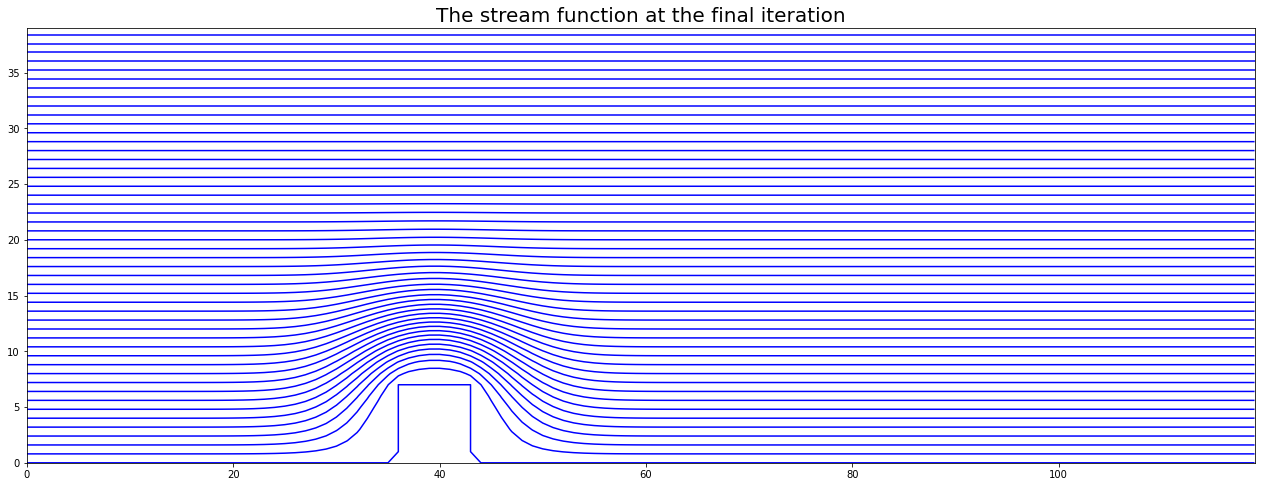

In [16]:
# question 1 
# plot the stream flow for h=1 R=0.01
q_1 = d_hydro2(0.01, 0.1, 1, 120, 40, 8, 8, 'yes','show')

number of iterations= 639


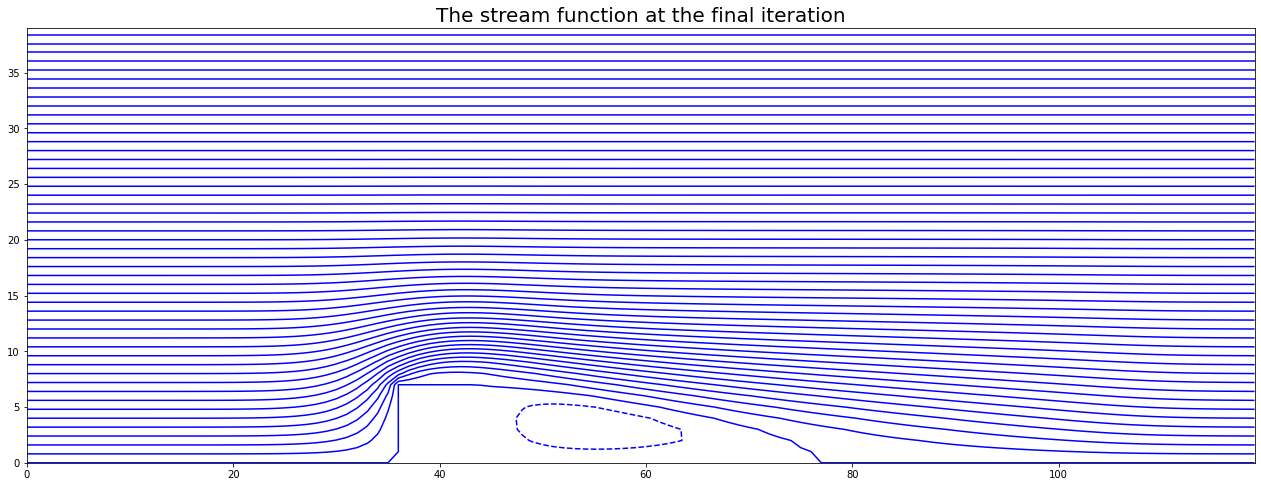

In [17]:
# question 2
# plot the stream flow for h=1 R=4
q_2=d_hydro2(4, 0.1, 1, 120, 40, 8, 8, 'yes','show')
            

In [27]:
# question 3 
#finding Re_critical for h=1
q_3 = find_Re(Rmax=3,Rmin=0.01,h=1)

number of iterations to find Re_critical - 7
Re_critical is - 5.766249999999999
R for which Re_critical is calculated -  0.36039062499999996


In [28]:
# question 4
#finding Re_critical for h=0.5
q4 = find_Re(Rmax=3,Rmin=0.01,h=0.5)

number of iterations to find Re_critical - 7
Re_critical is - 8.115
R for which Re_critical is calculated -  0.126796875


number of iterations= 478


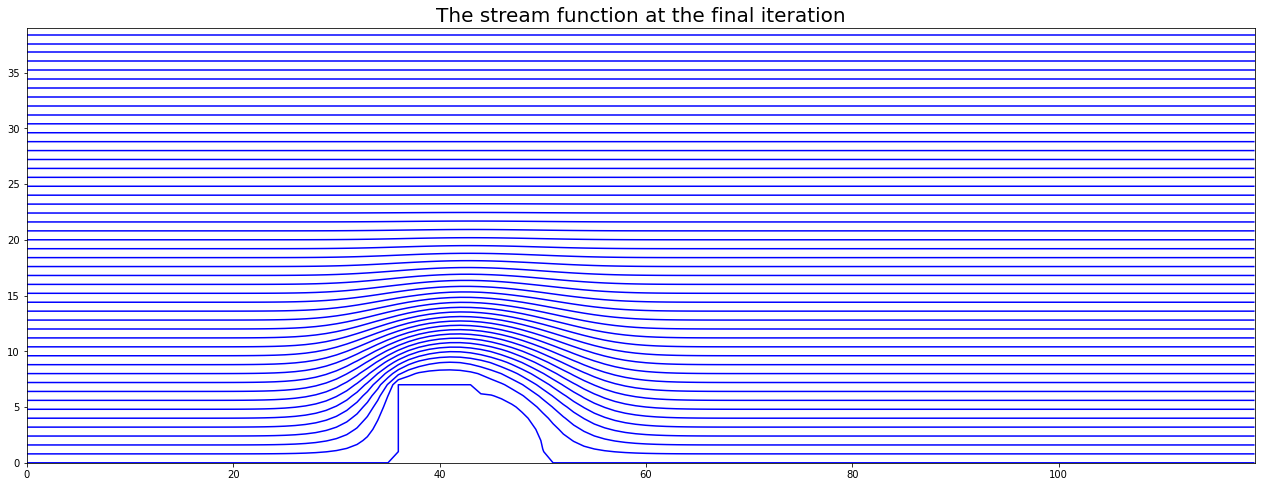

In [29]:
#question 5 
# plot of stream function for Re=2*Re_critical 
q5 = d_hydro2(0.72, 0.1, 1, 120, 40, 8, 8, 'yes','show')

number of iterations= 626


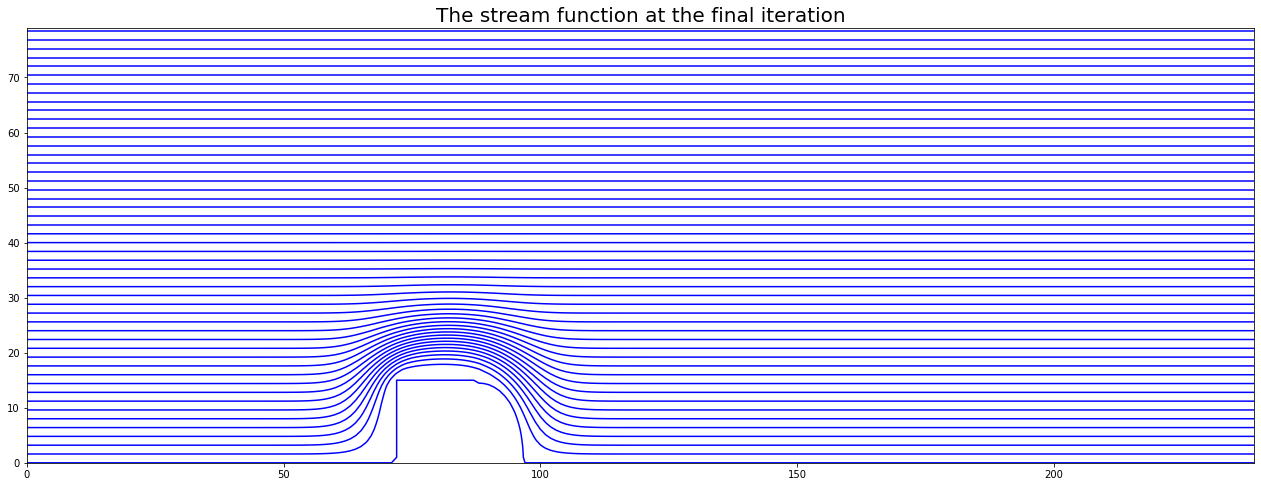

In [30]:
#question 6
# plot of stream function for Re=2*Re_critical of question 5  
q6 = d_hydro2(0.72, 0.1, 0.5, 120, 40, 8, 8, 'yes','show')